# 3 Trends to take notice of

1. CBS tweet were the most positive of all news organizations, yet they came in at an unimpressive mean score of 0.3355.

2. The only other news organization that had a mean positive score was BBC with 0.0679.

3. CNN, Fox News and NYTimes had mean score that all seemed to cross slightly into negative territory.

# Dependencies

In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime as dt 
import matplotlib.patches as mpatches
import os
import numpy as np

# Twitter API Keys

In [2]:
# Twitter API Keys
consumer_key = "QiXSjj5Jdr3rgST8mRefRaVU0"
consumer_secret = "2G1vw2GqzGg1iN0zKoR4EXzwRgnrSMRUfZviOdwlghOcJwikVo"
access_token = "936508446-Y4rpk0TmJsgH1s35Ot2qdJy2yidK9zNGjPvBxa6v"
access_token_secret = "ZhosHPGiHkY1h7vDgr14nk4cmPfJyDEqNO6nAUVmyKNg0"

# Setup Tweepy API

In [3]:
# Setup Tweepy API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# News Organizations List

In [4]:
#BBC, CBS, CNN, Fox, and New York times.
newsorg_list = ['BBC','CBS','CNN','FoxNews','NYTimes']
tweets = []
tweeting_newsorg = []
tweet_time = []

# Looping through tweets

In [5]:
#Looping through last 100 tweets for each news organization
for each in newsorg_list:
    all_tweeting = api.user_timeline(screen_name = each, count = 100)
    for tweet in all_tweeting:
        print(each + ": " + tweet['text'])
        tweets.append(tweet['text'])
        tweet_time.append(tweet["created_at"])        

        tweeting_newsorg.append(each)  

BBC: Could this be an answer to global water shortages? 🏜💧 This machine creates water out of thin air. 

https://t.co/caz4nXMJg5
BBC: Tonight, @regyates meets people whose lives have been devastated by the Grenfell fire. 

Reggie Yates: Searching fo… https://t.co/HPgtcZuHte
BBC: Tonight, @mcgregor_ewan and @McgColin celebrate the centenary of the Royal Air Force. 

RAF at 100 with Ewan and Co… https://t.co/nF2iwBP51b
BBC: The first ever statue of David Bowie has been unveiled in the town where he debuted Ziggy Stardust. ⚡️… https://t.co/lFgROYVkv1
BBC: When you're enjoying being single and people just can't deal with it. 🙄😂 @kathbum #LiveAtTheApollo 

https://t.co/byHMHWyhPq
BBC: 🇺🇸🏝🇬🇧 Welcome to Tangier Island, the tiny US island where people speak with a British accent.… https://t.co/1RoM285gRJ
BBC: 💬 We could listen to him speak all day. 

📽 Sir David Attenborough's voice was just as iconic in the 60s as it is t… https://t.co/zYi3oK5C13
BBC: Predictions suggest a build-up of about 8

CBS: Don’t miss a minute of the action. Stream the Elite Eight® games LIVE today starting at 2PM ET with a FREE trial of… https://t.co/8NwU8HdiHR
CBS: RT @MomCBS: That's a wrap on the #Mom panel at #PaleyFest! Thanks for following along! https://t.co/we4JgqPt6P
CBS: RT @MomCBS: A fan just commented that #Mom helped bring him out of a deep depression. 💜💜💜 #PaleyFest
CBS: RT @MomCBS: "Go out for it anyway. If you're good for the role, you're good for the role." @theJaimePressly's advice for aspiring actors wi…
CBS: RT @MomCBS: Mom Co-Creator @GemmaRBaker just pointed out her own #Mom in the audience at #PaleyFest! 💜
CBS: RT @MomCBS: "I'm not someone in recovery who goes to AA, but I have taken so much away from it...to take one day at a time." - @theJaimePre…
CBS: RT @MomCBS: "You get to appreciate working with such talented people." - @AnnaKFaris #Mom #PaleyFest
CBS: RT @MomCBS: “I love this job. I love working with these women. I love working in front of the live audience… It’s alive a

CNN: Stormy Daniels interview adds to "60 Minutes" legacy of big hits https://t.co/q5LxP4G2ku https://t.co/IXtljm6IP9
CNN: Facebook's Zuckerberg says sorry in full-page newspaper ads https://t.co/uchVl0f1EI https://t.co/VkKlB7VzmQ
CNN: A conservative media executive who is close with President Trump said the President told him Saturday he expects mo… https://t.co/syUiXUZP4i
CNN: President Trump's attorney says husband-and-wife legal team Joseph diGenova and Victoria Toensing won't join legal… https://t.co/fTlnDqJ4Bf
CNN: Everything you need to know ahead of Stormy Daniels' "60 Minutes" interview https://t.co/9goGs0LO3J https://t.co/xJ0RDRT1GW
CNN: Monégasque racing driver Charles Leclerc impresses on debut in Australia https://t.co/lR1qvWSlYn https://t.co/KmYSAA2JVX
CNN: Wisconsin students take gun reform fight to House Speaker Paul Ryan's hometown https://t.co/jpKPV0Lm5p https://t.co/wsP3WVHlcH
CNN: Renaissance popes like Rodrigo Borgia made incredible cultural advancements, but at wh

FoxNews: .@realDonaldTrump touts $1.3 trillion budget as win for military; vows more money for border wall https://t.co/CIwjkQj4jc
FoxNews: Yesterday, @davidhogg111: "Let's put the USA over the @NRA." #MarchForOurLives https://t.co/2Llc6rFMEf https://t.co/4dOweVpIOR
FoxNews: U.S. markets - this week. https://t.co/3917lCT0t4
FoxNews: .@Facebook CEO Mark Zuckerberg took out full-page ads in several newspapers to apologize for the "breach of trust"… https://t.co/kcjROJPMbG
FoxNews: Lawyers diGenova, Toensing cannot work on Trump's Russia legal team https://t.co/YakXrPX5bT
FoxNews: On @foxandfriends, @PeteHegseth strongly defended the Second Amendment. https://t.co/YRyHLDkaUa https://t.co/vWWZGsmtW3
FoxNews: DNC vs. RNC fundraising - 2018 election cycle. https://t.co/nfGU5SXFRO
FoxNews: At the #MarchforourLives rally in Washington, D.C. yesterday, Trevon "Tre" Bosley, 19, of Chicago, whose brother Te… https://t.co/hhHEqw6eBa
FoxNews: Drone strike in Libya kills 2 'terrorists,' US Africa Co

NYTimes: In Opinion,
Contributing writer Jennifer Finney Boylan writes, "Trump’s cabinet is full of people who seem to know… https://t.co/XC7txobKnA
NYTimes: “It’s a disaster,” said Cristiano Davoli, a vigilante hero in the battle against the voracious potholes that have o… https://t.co/VWyBdtv8k0
NYTimes: “Silicon Valley” returns to HBO tonight after a particularly terrible week for Silicon Valley https://t.co/MPhzTUmbcM
NYTimes: It took giant robots fighting giant monsters to finally unseat “Black Panther” at the top of the box office https://t.co/nIxC1MlXI6
NYTimes: Many Americans can buy a gun in less than an hour. In some countries, the process takes months. https://t.co/UKtjiHnOpT
NYTimes: Hungary’s opposition parties could stop Viktor Orban from winning another majority — but only if they work together https://t.co/Trjb7Ggjnw
NYTimes: Emma González spoke for just under 2 minutes. Then she was silent for 4 minutes and 26 seconds. https://t.co/rUWqaXlTWT
NYTimes: RT @Choire: so ba

# Creat Dataframe

In [6]:
# Creat Dataframe
tweet_df = pd.DataFrame()
tweet_df["NewsOrg"] = tweeting_newsorg
tweet_df["Tweets"] = tweets
tweet_df["Time"] = tweet_time
tweet_df.head()

,NewsOrg,Tweets,Time
0,BBC,Could this be an answer to global water shorta...,Sun Mar 25 19:44:01 +0000 2018
1,BBC,"Tonight, @regyates meets people whose lives ha...",Sun Mar 25 19:15:06 +0000 2018
2,BBC,"Tonight, @mcgregor_ewan and @McgColin celebrat...",Sun Mar 25 18:40:04 +0000 2018
3,BBC,The first ever statue of David Bowie has been ...,Sun Mar 25 18:13:03 +0000 2018
4,BBC,When you're enjoying being single and people j...,Sun Mar 25 17:30:07 +0000 2018


# Set up for Sentiment Analysis

In [7]:
# Set up for Sentiment Analysis
compound = []
pos = []
neu = []
neg = []

for x in tweet_df["Tweets"]:
    scores = analyzer.polarity_scores(x)
    #print(scores)    
    compound.append(scores['compound'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    neg.append(scores['neg']) 


# Create Dataframe

In [8]:
# Create Dataframe
tweet_df["Compound Score"] = compound
tweet_df["Positive Score"] = pos
tweet_df["Negative Score"] = neg
tweet_df["Neutral Score"] = neu
tweet_df.head()


,NewsOrg,Tweets,Time,Compound Score,Positive Score,Negative Score,Neutral Score
0,BBC,Could this be an answer to global water shorta...,Sun Mar 25 19:44:01 +0000 2018,0.1280,0.101,0.077,0.821
1,BBC,"Tonight, @regyates meets people whose lives ha...",Sun Mar 25 19:15:06 +0000 2018,-0.7506,0.000,0.286,0.714
2,BBC,"Tonight, @mcgregor_ewan and @McgColin celebrat...",Sun Mar 25 18:40:04 +0000 2018,0.5719,0.163,0.000,0.837
3,BBC,The first ever statue of David Bowie has been ...,Sun Mar 25 18:13:03 +0000 2018,0.0000,0.000,0.000,1.000
4,BBC,When you're enjoying being single and people j...,Sun Mar 25 17:30:07 +0000 2018,0.5267,0.185,0.000,0.815


# Creat CSV

In [9]:
# Creat CSV
tweet_df.to_csv("Tweets_Sentiment.csv")

# Do My GroupBy

In [10]:
# Do My GroupBy
tweet_df['Tweets Ago'] = tweet_df.groupby('NewsOrg')['Time'].rank(ascending=False)

# Create date format

In [11]:
# Create date format
date = dt.date.today
date = dt.datetime.today().strftime("%m/%d/%Y")

# Set up my colors for plot

In [12]:
# Set up my colors
tweet_df["coloring"]= tweet_df["NewsOrg"]
tweet_df.loc[:, 'coloring'].replace(["BBC", "CBS", "CNN", "FoxNews", "NYTimes"], ["blue", "violet", "orange", "gray","gold"],
                                  inplace=True)
colors= tweet_df["coloring"].values

# Create My Plot

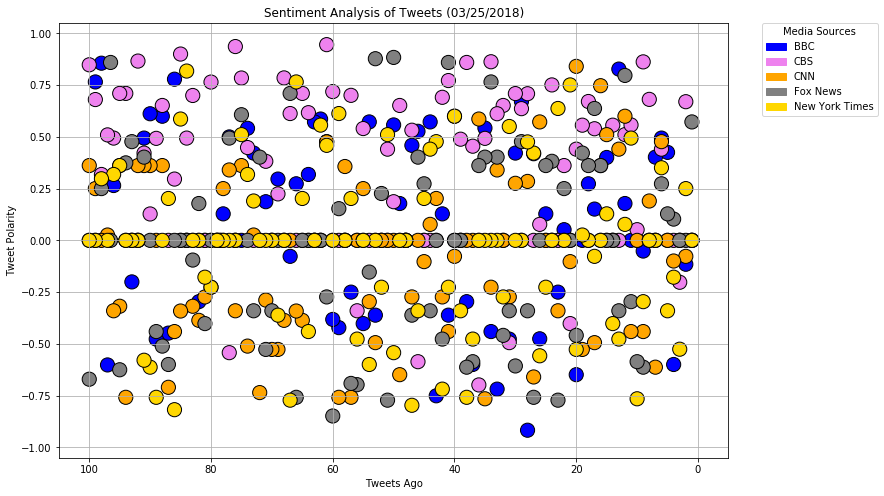

In [13]:
# Create My Plot
plt.figure(figsize=(12,8))

#plt.colors
plt.scatter(tweet_df['Tweets Ago'], tweet_df['Compound Score'], marker='o'
            ,c=colors, edgecolors='black',s=200)

one = mpatches.Patch(color='blue', label='BBC')
two = mpatches.Patch(color='violet', label='CBS')
three = mpatches.Patch(color='orange', label='CNN')
four = mpatches.Patch(color='gray', label='Fox News')
five = mpatches.Patch(color='gold', label='New York Times')

# Incorporate the other graph properties
plt.title('Sentiment Analysis of Tweets ('+ date +")")
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.grid(True)
plt.xlim(105, -5)
plt.ylim(-1.05, 1.05)

plt.legend(title="Media Sources", handles=[one, two, three, four, five],
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Save the figure
plt.savefig('Sentiment_analysis_scatter_plot.png')

# Show plot
plt.show()

# Do My GroupBy

In [14]:
# Do My GroupBy
pd.options.display.float_format = '{:,.4f}'.format
tweet_df_new = tweet_df.groupby("NewsOrg")
tweet_df_new = tweet_df_new["Compound Score"].mean()
tweet_df_new = pd.DataFrame(tweet_df_new)
tweet_df_new.head()

,Compound Score
NewsOrg,
BBC,0.0679
CBS,0.3355
CNN,-0.0705
FoxNews,-0.0121
NYTimes,-0.0210


# Set up my colors

In [15]:
# Set up my colors
tweet_df_new["coloring"]= tweet_df_new.index
tweet_df_new.loc[:, 'coloring'].replace(["BBC", "CBS", "CNN", "FoxNews", "NYTimes"], ["blue", "violet", "orange", "gray","gold"],
                                  inplace=True)
colors_new= tweet_df_new["coloring"].values
ticks=["BBC", "CBS", "CNN", "Fox", "NYT"]

# Create My Plot

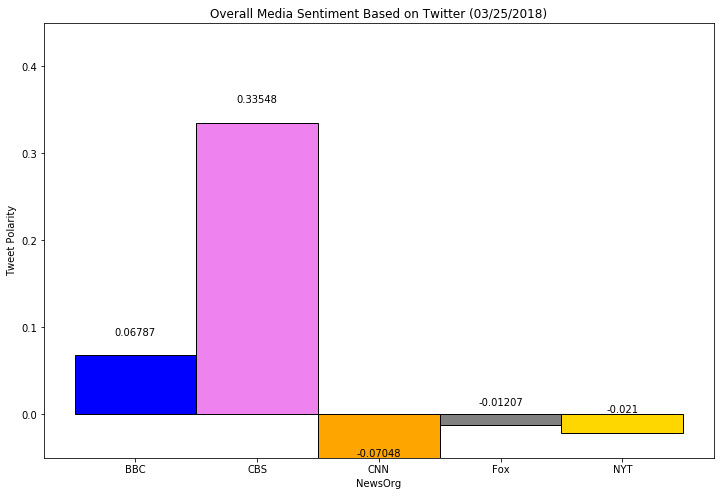

In [16]:
# Create My Plot
fig, ax = plt.subplots()

rects = ax.bar(tweet_df_new.index,tweet_df_new["Compound Score"],edgecolor=['black']*len(x),color=colors_new,
       tick_label=ticks, width=1.0)

plt.ylim(-0.05, 0.45)

plt.title('Overall Media Sentiment Based on Twitter ('+ date+")")
plt.ylabel('Tweet Polarity')
plt.xlabel('NewsOrg')


labels = round(tweet_df_new["Compound Score"], 5)


for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.02, label, ha='center', va='bottom')

    fig = plt.gcf()
fig.set_size_inches(12,8)

plt.savefig('Overall_Sentiment_barplot.png')

plt.show()